## Metric-data 탐색

In [1]:
import os, sys
import tqdm
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

In [2]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt

from src.visualization import plot_action
from src.preprocess_data import preprocess_data
from src.labels import get_value_labels

In [3]:
import pandas as pd
tracks = pd.read_csv('../metrica-data/tracking-data/match1.csv')
tracks.head()

,frame,session,time,phase,episode,team_poss,player_poss,event_player,event_type,A11_x,...,B27_speed,B27_accel,B28_x,B28_y,B28_vx,B28_vy,B28_speed,B28_accel,ball_x,ball_y
0,1,1,0.1,1,1,B,NaN,B19,PASS,0.100440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.476120,28.917630
1,2,1,0.2,1,1,B,NaN,B21,PASS,0.131004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.299344,30.117744
2,3,1,0.3,1,1,B,NaN,B21,PASS,0.150012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.219936,27.419544
3,4,1,0.4,1,1,B,NaN,B21,PASS,0.129600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.665544,24.435792
4,5,1,0.5,1,1,B,NaN,B21,PASS,0.086724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.113312,21.437568


### 학습에 사용하기 위한 데이터 전처리

- preprocess_data

1. cleanse_metrica_event_data : 패스 성공 여부 / 골 / 자책골 유무를 레이블하는 작업
2. make_freeze_frame : 각 이벤트에 참여하는 선수들의 위치 / 속도 데이터

In [4]:
file_names = ['match1.csv','match2.csv','match3.csv','match3_valid.csv','match3_test.csv']
save_folder = "../metrica-data/EPV-data"

if not os.path.exists(save_folder):
    os.makedirs(save_folder)

all_events = []
for file_name in file_names:
    game_id = file_name.replace('match','').replace('.csv','')

    events, tracks = preprocess_data(game_id, save_folder=save_folder, field_dimen=(108,72))
    events = get_value_labels(events)
    
    events['game_id'] = game_id
    if game_id in ['1','2','3']:
        all_events.append(events)

all_events = pd.concat(all_events).reset_index(drop=True)
all_events['pass_id'] = np.arange(len(all_events))
# all_events.to_csv('../metrica-data/EPV-data/all-match.csv',index=False)

RangeIndex(start=0, stop=1745, step=1)
      team       type       subtype  session  start_frame  start_time  \
0     Away  SET PIECE      KICK OFF        1            1         0.1   
1     Away       PASS          PASS        1            1         0.1   
2     Away       PASS          PASS        1            2         0.2   
3     Away       PASS          PASS        1           18         1.8   
4     Away       PASS          PASS        1           31         3.1   
...    ...        ...           ...      ...          ...         ...   
1740  Home       PASS          PASS        2        57345      5734.5   
1741  Home       PASS          PASS        2        57432      5743.2   
1742  Home  BALL LOST  INTERCEPTION        2        57440      5744.0   
1743  Away   RECOVERY       BLOCKED        2        57447      5744.7   
1744  Away   BALL OUT      BALL OUT        2        57449      5744.9   

      end_frame  end_time from   to  ...  end_x  end_y  phase  goal  ownGoal  \
0   

NameError: name 'aa' is not defined

In [5]:
import ast 
all_events = pd.read_csv('../metrica-data/EPV-data/all-match.csv')
all_events['freeze_frame'] = all_events['freeze_frame'].apply(ast.literal_eval)
all_events

,team,type,subtype,session,start_frame,start_time,end_frame,end_time,from,to,...,goal,ownGoal,teamId,eventName,subEventName,accurate,freeze_frame,value_label,game_id,pass_id
0,Away,SET PIECE,KICK OFF,1,1,0.1,0,0.0,B19,NaN,...,0,0,2,Set piece,Kick off,0,{},0,1,0
1,Away,PASS,PASS,1,1,0.1,2,0.2,B19,B21,...,0,0,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba...",0,1,1
2,Away,PASS,PASS,1,2,0.2,7,0.7,B21,B15,...,0,0,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba...",0,1,2
3,Away,PASS,PASS,1,18,1.8,25,2.5,B15,B19,...,0,0,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba...",0,1,3
4,Away,PASS,PASS,1,31,3.1,39,3.9,B19,B21,...,0,0,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba...",0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,Home,PASS,PASS,2,57363,5736.3,57388,5738.8,B29,B33,...,0,0,1,Pass,Pass,1,"{'A01': {'teammate': False, 'actor': False, 'b...",0,3,7295
7296,Home,PASS,PASS,2,57388,5738.8,57413,5741.3,B33,B34,...,0,0,1,Pass,Pass,1,"{'A01': {'teammate': False, 'actor': False, 'b...",0,3,7296
7297,Home,CARRY,CARRY,2,57388,5738.8,57388,5738.8,B33,NaN,...,0,0,1,Carry,Carry,0,"{'A01': {'teammate': False, 'actor': False, 'b...",0,3,7297
7298,Home,CARRY,CARRY,2,57413,5741.3,57422,5742.2,B34,NaN,...,0,0,1,Carry,Carry,0,"{'A01': {'teammate': False, 'actor': False, 'b...",0,3,7298


In [7]:
all_events[all_events['type'] == 'PASS']['accurate'].value_counts()

accurate
1    2884
Name: count, dtype: int64

In [8]:
all_events[all_events['eventName'] == 'Pass']['accurate'].value_counts()

accurate
1    2884
0     420
Name: count, dtype: int64

In [12]:
pass_events = all_events[all_events['eventName'] == 'Pass']
pass_events.head()

,team,type,subtype,session,start_frame,start_time,end_frame,end_time,from,to,...,end_y,phase,goal,ownGoal,teamId,eventName,subEventName,accurate,freeze_frame,game_id
1,Away,PASS,PASS,1,1,0.1,2,0.2,B19,B21,...,0.43,1,0,0,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba...",1
2,Away,PASS,PASS,1,2,0.2,7,0.7,B21,B15,...,0.21,1,0,0,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba...",1
3,Away,PASS,PASS,1,18,1.8,25,2.5,B15,B19,...,0.31,1,0,0,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba...",1
4,Away,PASS,PASS,1,31,3.1,39,3.9,B19,B21,...,0.47,1,0,0,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba...",1
5,Away,PASS,PASS,1,77,7.7,87,8.7,B21,B22,...,0.98,1,0,0,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba...",1


In [13]:
pass_events.groupby('game_id')['accurate'].value_counts()

game_id  accurate
1        1            799
         0            152
2        1            964
         0            142
3        1           1121
         0            126
Name: count, dtype: int64

In [ ]:
all_events.columns

Index(['team', 'type', 'subtype', 'session', 'start_frame', 'start_time',
       'end_frame', 'end_time', 'from', 'to', 'start_x', 'start_y', 'end_x',
       'end_y', 'phase', 'goal', 'ownGoal', 'teamId', 'eventName',
       'subEventName', 'accurate', 'freeze_frame'],
      dtype='object')

In [ ]:
all_events[all_events['eventName'] == 'Pass']['subtype'].unique()

array(['PASS', 'INTERCEPTION', 'HEAD-INTERCEPTION', 'HEAD', 'CROSS',
       'GOAL KICK', 'CROSS-INTERCEPTION', 'GOAL KICK-INTERCEPTION',
       'DEEP BALL', 'THROUGH BALL-DEEP BALL', 'HEAD-CLEARANCE',
       'CLEARANCE', 'HEAD-INTERCEPTION-CLEARANCE',
       'CLEARANCE-INTERCEPTION', 'THROUGH BALL-DEEP BALL-INTERCEPTION',
       'OFFSIDE', 'DEEP BALL-OFFSIDE'], dtype=object)

In [ ]:
pass_event = all_events[all_events['eventName'] == 'Pass']
pass_event[pass_event['end_frame'] - pass_event['start_frame'] <=5].head()

,team,type,subtype,session,start_frame,start_time,end_frame,end_time,from,to,...,end_x,end_y,phase,goal,ownGoal,teamId,eventName,subEventName,accurate,freeze_frame
1,Away,PASS,PASS,1,1,0.1,2,0.2,B19,B21,...,0.55,0.43,1,0,0,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba..."
2,Away,PASS,PASS,1,2,0.2,7,0.7,B21,B15,...,0.58,0.21,1,0,0,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba..."
28,Home,BALL LOST,INTERCEPTION,1,548,54.8,550,55.0,A08,NaN,...,0.88,0.28,1,0,0,1,Pass,Interception,0,"{'A11': {'teammate': True, 'actor': False, 'ba..."
187,Home,BALL LOST,INTERCEPTION,1,5892,589.2,5897,589.7,A08,NaN,...,0.92,0.40,1,0,0,1,Pass,Interception,0,"{'A11': {'teammate': True, 'actor': False, 'ba..."
207,Home,PASS,PASS,1,6168,616.8,6172,617.2,A09,A05,...,0.70,0.88,1,0,0,1,Pass,Pass,1,"{'A11': {'teammate': True, 'actor': False, 'ba..."


### 패스 이벤트 시각화

In [ ]:
col = ['team', 'type', 'subtype', 'session', 'start_frame', 'start_time',
       'end_frame', 'end_time','phase','teamId', 'eventName',
       'subEventName', 'accurate', 'freeze_frame', 'game_id']

all_events.groupby(['game_id', 'session']).head(2)[col]

,team,type,subtype,session,start_frame,start_time,end_frame,end_time,phase,teamId,eventName,subEventName,accurate,freeze_frame,game_id
0,Away,SET PIECE,KICK OFF,1,1,0.1,0,0.0,1,2,Set piece,Kick off,0,{},1
1,Away,PASS,PASS,1,1,0.1,2,0.2,1,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba...",1
892,Home,SET PIECE,KICK OFF,2,28854,2885.4,28854,2885.4,3,1,Set piece,Kick off,0,"{'A11': {'teammate': True, 'actor': False, 'ba...",1
893,Home,PASS,PASS,2,28854,2885.4,28864,2886.4,3,1,Pass,Pass,1,"{'A11': {'teammate': True, 'actor': False, 'ba...",1
1745,Away,SET PIECE,KICK OFF,1,21,2.1,21,2.1,1,2,Set piece,Kick off,0,"{'B25': {'teammate': True, 'actor': False, 'ba...",2
1746,Away,PASS,PASS,1,21,2.1,35,3.5,1,2,Pass,Pass,1,"{'B25': {'teammate': True, 'actor': False, 'ba...",2
2774,Home,SET PIECE,KICK OFF-RETAKEN,2,27197,2719.7,27197,2719.7,2,1,Set piece,Kick off-retaken,0,"{'A11': {'teammate': True, 'actor': False, 'ba...",2
2775,Home,PASS,PASS,2,27197,2719.7,27209,2720.9,2,1,Pass,Pass,1,"{'A11': {'teammate': True, 'actor': False, 'ba...",2
3680,Away,SET PIECE,KICK OFF,1,145,14.5,145,14.5,1,2,Set piece,Kick off,0,"{'A11': {'teammate': True, 'actor': False, 'ba...",3
3681,Away,PASS,PASS,1,145,14.5,151,15.1,1,2,Pass,Pass,1,"{'A11': {'teammate': True, 'actor': False, 'ba...",3


In [14]:
pd.DataFrame.from_dict(all_events.loc[5445]['freeze_frame'],orient='columns')

,B28,B18,B20,B21,B22,B23,B24,B25,B26,B27,...,A02,A04,A05,A06,A07,A08,A10,A12,A13,ball
teammate,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
actor,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
ball,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
start_x,102.38508,72.353088,75.801528,73.175724,65.201436,63.29232,68.263128,55.249236,55.034964,53.902152,...,29.637684,40.84128,51.574644,43.350444,53.74944,42.448968,53.968572,30.909816,53.052408,53.88876
start_y,37.98216,22.914216,42.09588,63.40824,24.304032,37.638936,50.15304,51.438888,23.744808,35.977536,...,40.314672,14.131368,55.401552,37.554624,24.234192,34.406856,45.81036,30.41568,15.7176,35.96544
start_vx,-0.027,0.608214,1.376534,0.792818,0.000436,-0.057884,0.549816,0.804973,0.050546,-0.283718,...,-0.044046,-0.520371,0.43377,0.963292,0.05261,0.029754,0.748928,0.277585,0.078493,None
start_vy,0.05202,-1.600961,0.32404,0.711018,-0.815485,-0.401199,-0.104143,-0.711521,-0.083713,-0.359896,...,-0.49077,0.025764,-0.567514,0.65948,-0.009207,-2.64957,-1.011382,-0.583715,0.174399,None
end_x,102.36456,72.921492,76.858956,73.576836,64.836828,63.223524,68.608836,55.82412,54.937548,53.242164,...,30.020976,40.564044,52.221888,44.569332,54.05292,43.103448,55.245456,31.456728,53.511408,62.394516
end_y,38.02392,21.575304,42.43968,64.218168,23.46336,37.589976,50.373,51.144336,23.638752,35.543016,...,40.192488,14.391864,55.135656,38.121912,24.273864,32.507496,44.563176,29.968056,15.70464,37.465416
end_vx,-0.024772,0.766568,1.23912,0.234126,-0.842017,-0.123097,0.261209,0.625491,-0.285508,-1.234543,...,0.97126,-0.216297,1.154563,2.084909,0.708686,1.569676,2.331365,0.977554,1.022629,None


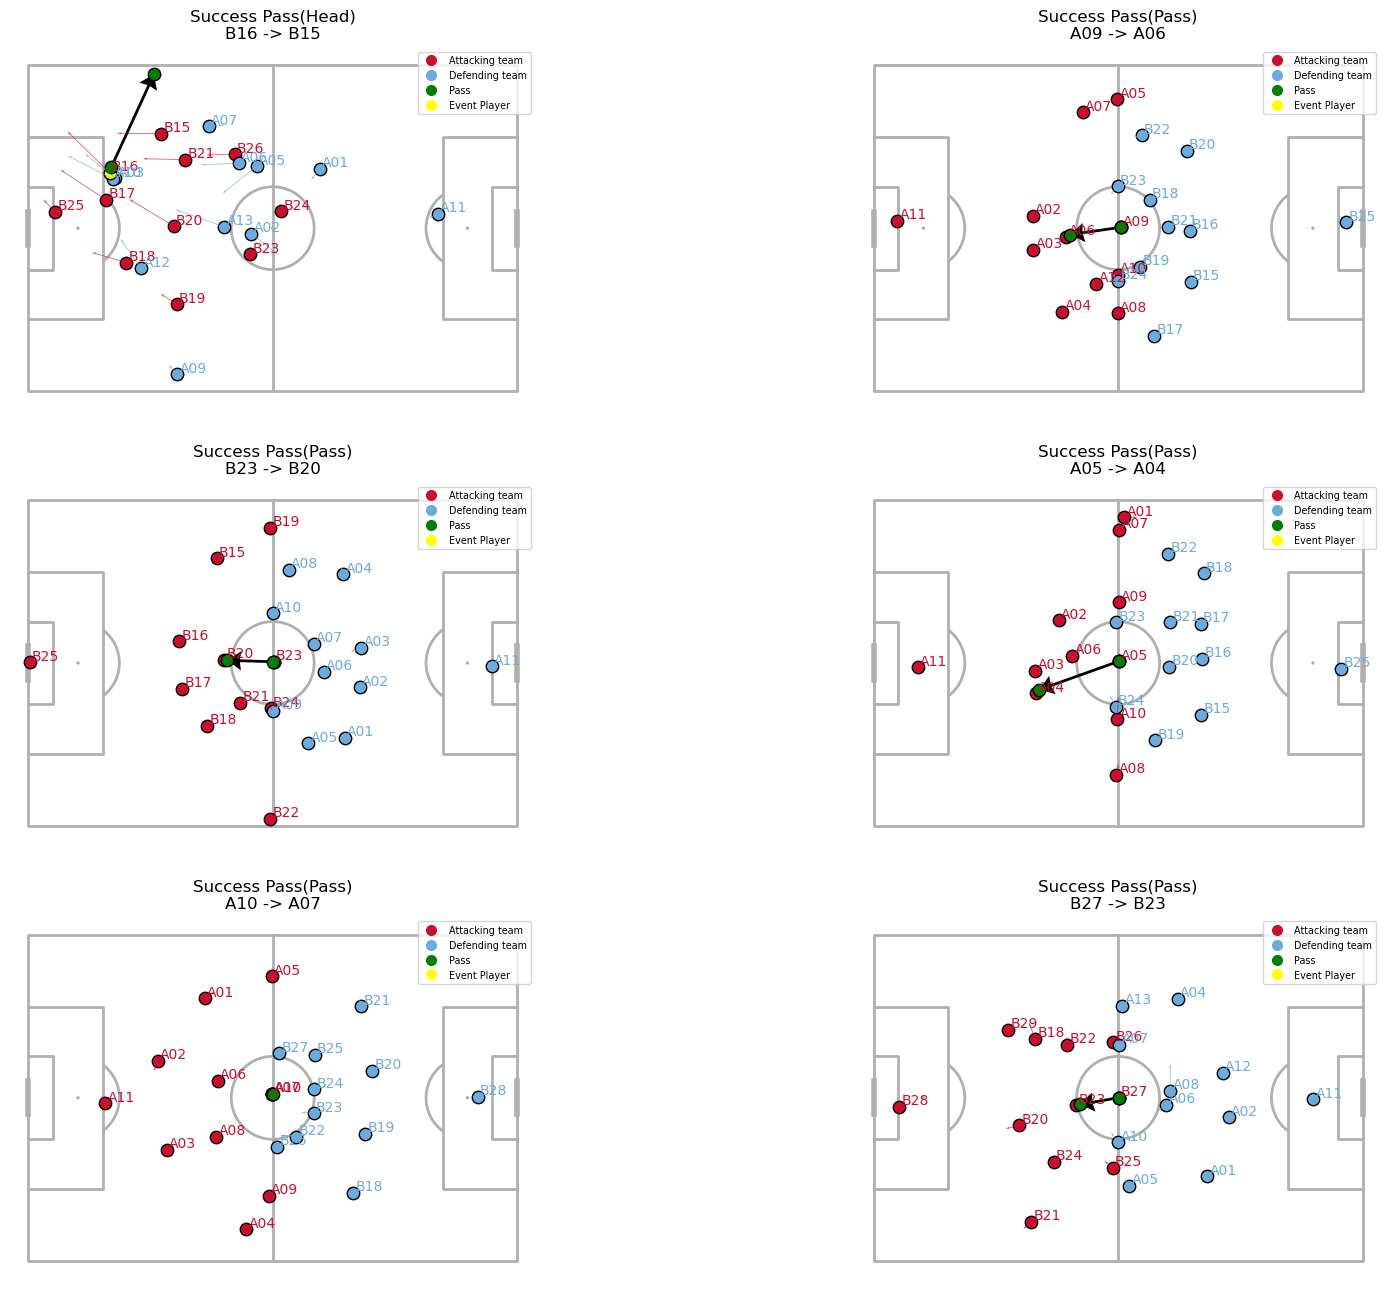

In [6]:
action_id = [1,893, 1746, 2775, 3681, 5445]

fig, ax = plt.subplots(3,2,figsize=(20,16))

ax_id = [ax[0,0], ax[0,1], ax[1,0], ax[1,1], ax[2,0], ax[2,1]] 


for i in range(len(action_id)):
    record = all_events.loc[action_id[i]]
    plot_action(record, ax=ax_id[i],field_dimen=(108,72))

plt.show()

### 각 Metrica경기에서 홈팀(A)가 왼쪽에서 시작하는지 오른쪽에서 시작하는지 파악함

1. metrica1 : home(A) & away(B)
- 전반전 : home(A) - away(B)
- 후반적 : away(B) - home(A) => flip필요성

2. metrica2 : home(A) & away(B)
- 전반전 :  away(B) - hOME(A) => flip필요성
- 후반적 :  home(A) - away(B)

3. metrica3 : home(B) & away(A)
- 전반전 :  home(B) - away(A)
- 후반적 :  away(A) - home(B) => flip필요성

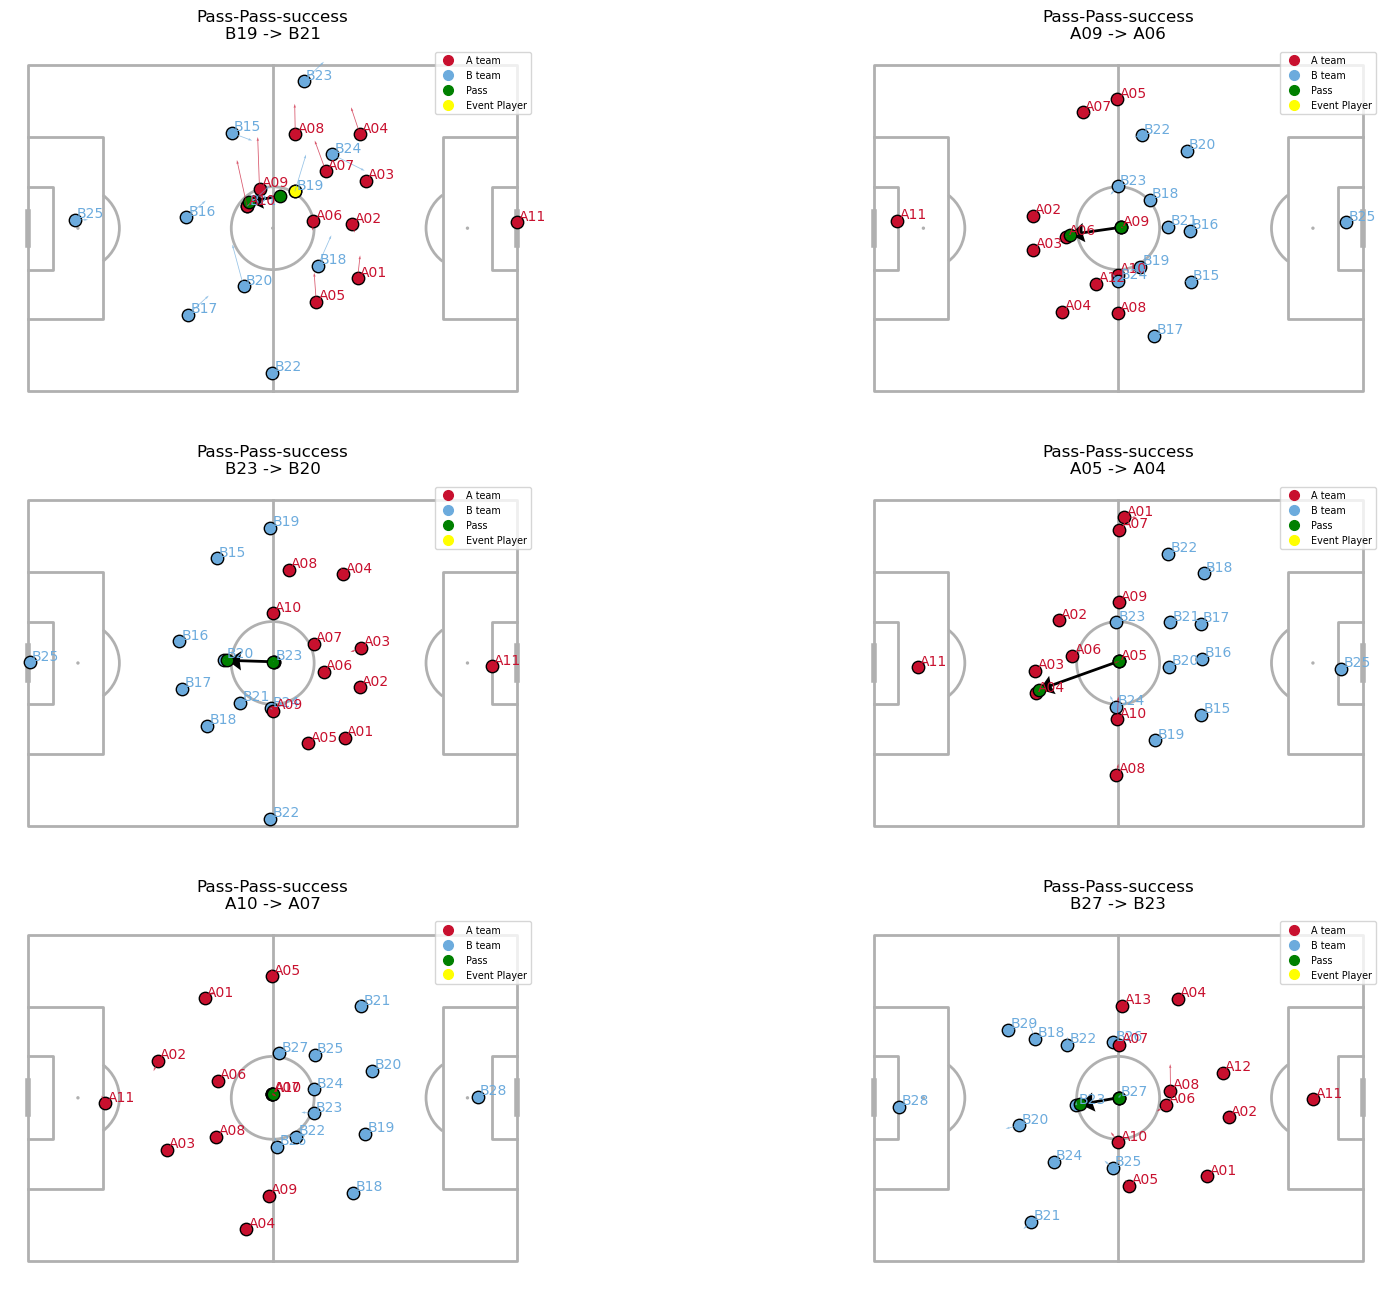

In [6]:
action_id = [1,893, 1746, 2775, 3681, 5445]

fig, ax = plt.subplots(3,2,figsize=(20,16))

ax_id = [ax[0,0], ax[0,1], ax[1,0], ax[1,1], ax[2,0], ax[2,1]] 


for i in range(len(action_id)):
    record = all_events.loc[action_id[i]]
    plot_action(record, ax=ax_id[i],field_dimen=(108,72))

plt.show()

### Metrica-data 각 type별 특징 파악하기

In [ ]:
all_events['type'].value_counts()

type
PASS              799
RECOVERY          278
BALL LOST         257
CHALLENGE         233
SET PIECE          77
BALL OUT           51
SHOT               24
FAULT RECEIVED     22
CARD                4
Name: count, dtype: int64

#### 1. SET PIECE

세트피스

- FREE KICK
- CORNER KICK
- THROW IN
- PENALTY
- KICK OFF

In [ ]:
events[events['type'] == 'SET PIECE']['subtype'].value_counts()

subtype
FREE KICK      32
THROW IN       28
CORNER KICK    11
KICK OFF        6
Name: count, dtype: int64

#### 2. RECOVERY

선수가 상대방를 방해하거나 세트피스가 아닌 정지된 봉 상황에서 볼을 경기에 다시 들어오게함

- INTERCEPTION : 상대방의 패스를 상대선수가 가로챔
- RECOVERY : 볼을 다시 들어오게함(골킥)   
- THEFT : 소유중인 상대방 공을 뺏음
- SAVED : 골키퍼 OR 마지막수비수가 상대방의 슛을 막음
- BLOCKED : 골을 방어하는 마지막 선수가 아니며ㅑ 슛을 크게 변경시킴.         

In [ ]:
events[events['type'] == 'RECOVERY']['subtype'].value_counts()

subtype
INTERCEPTION    162
RECOVERY         84
THEFT            23
SAVED             7
BLOCKED           2
Name: count, dtype: int64

In [ ]:
events[events['subtype'] == 'BLOCKED'].head()

,team,type,subtype,session,start_frame,start_time,end_frame,end_time,from,to,start_x,start_y,end_x,end_y,phase,freeze_frame
667,Home,SHOT,BLOCKED,1,21510,2151.0,21510,2151.0,A05,NaN,0.86,0.72,0.89,0.73,2,"[{'teammate': True, 'actor': False, 'ball': Fa..."
668,Away,RECOVERY,BLOCKED,1,21511,2151.1,21511,2151.1,B22,NaN,0.89,0.70,NaN,NaN,2,"[{'teammate': True, 'actor': False, 'ball': Fa..."
1743,Away,RECOVERY,BLOCKED,2,57447,5744.7,57447,5744.7,B16,NaN,0.05,0.62,NaN,NaN,8,"[{'teammate': True, 'actor': False, 'ball': Fa..."


<Axes: title={'center': 'RECOVERY-BLOCKED'}>

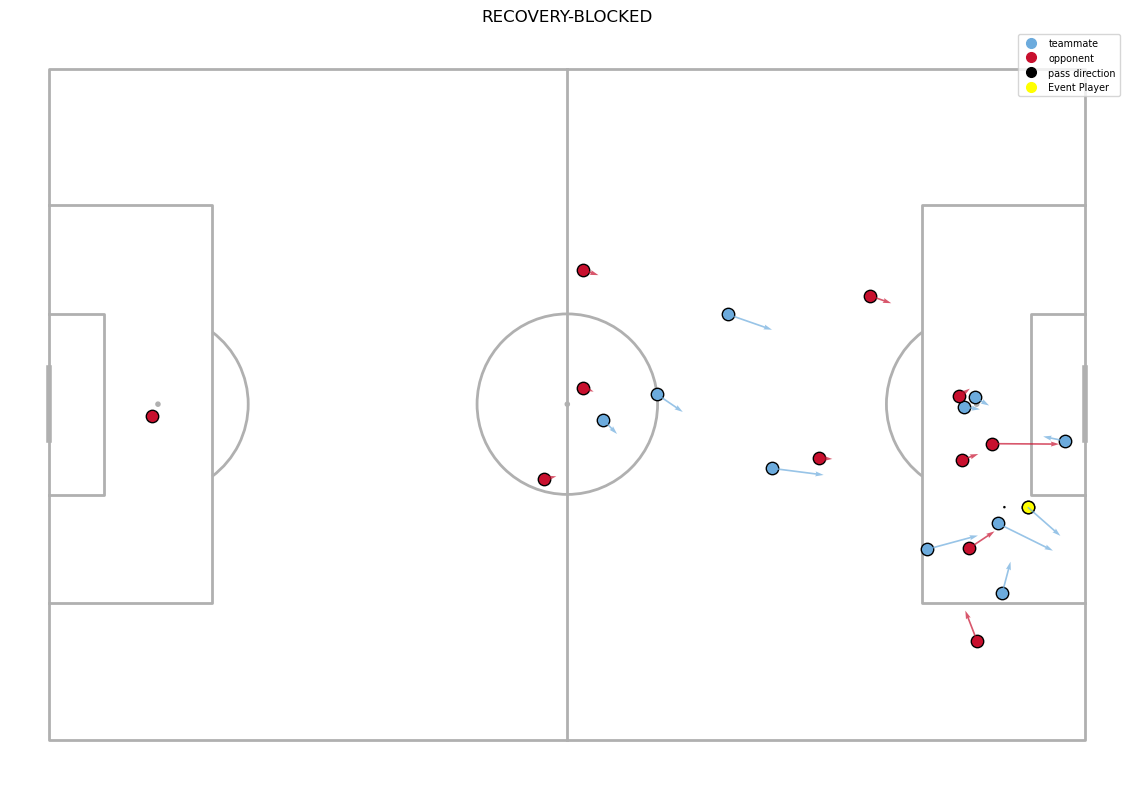

In [ ]:
plot_action(events.loc[1743])

#### 3. PASS

선수 사이에 패스

- PASS                     
- HEAD                       
- GOAL KICK                  
- CROSS                      
- DEEP BALL : 정지상황에서의 패스                 
- HEAD-CLEARANCE : 상대방의 패스를 머리로 걷어냄        
- THROUGH BALL-DEEP BALL : 정지상황에서 깊은 스루 패스(상대 수비 라인을 통과하는 패스)     
- CLEARANCE : 상대방의 패스를 걷어냄

In [ ]:
events[events['type'] == 'PASS']['subtype'].value_counts()

subtype
PASS                      757
HEAD                       20
GOAL KICK                  13
CROSS                       3
DEEP BALL                   2
HEAD-CLEARANCE              2
THROUGH BALL-DEEP BALL      1
CLEARANCE                   1
Name: count, dtype: int64

In [ ]:
events[events['subtype'] == 'THROUGH BALL-DEEP BALL'].head()

,team,type,subtype,session,start_frame,start_time,end_frame,end_time,from,to,start_x,start_y,end_x,end_y,phase,freeze_frame
656,Home,PASS,THROUGH BALL-DEEP BALL,1,21421,2142.1,21442,2144.2,A10,A07,0.78,0.7,0.97,0.77,2,"[{'teammate': True, 'actor': False, 'ball': Fa..."


<Axes: title={'center': 'PASS-THROUGH BALL-DEEP BALL'}>

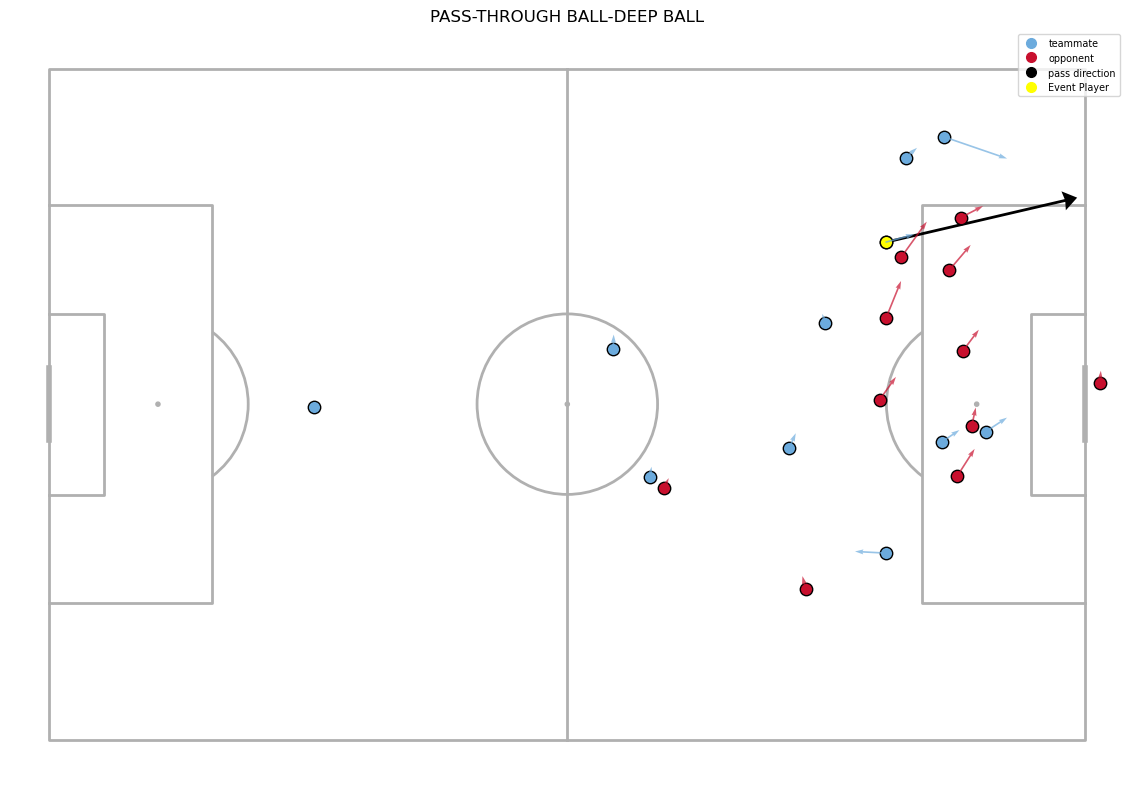

In [ ]:
plot_action(events.loc[656])

PASS          해결   
RECOVERY    해결 
BALL LOST         
CHALLENGE         
SET PIECE    해결     
BALL OUT           
SHOT               
FAULT RECEIVED     
CARD                